1) Set up a Git repository to allow you  to collaborate on the Python solution.

I set up a Git repository and shared the link on my dropbox submission. Since I have no group members, there was no collaboration

2)	Read the daily confirmed cases and deaths into two dataframes can be found at this github page

In [ ]:
url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

import pandas as pd
confirmed_cases = pd.read_csv(url1)
Deaths = pd.read_csv(url2)

print(confirmed_cases.head())
print()
print(Deaths.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [ ]:
#Unpivot the dataframe except the categorical data and remove unnneccessary columns
cols_to_melt_C = confirmed_cases.columns[4:].tolist()
cols_to_melt_D = Deaths.columns[4:].tolist()

# melt the selected columns into rows, using 'country/Region' as the identifier variable
melt_C = pd.melt(confirmed_cases, id_vars=['Country/Region'], value_vars=cols_to_melt_C, var_name='Date', value_name='Confirmed')
melt_D = pd.melt(Deaths, id_vars=['Country/Region'], value_vars=cols_to_melt_D, var_name='Date', value_name='Death')

print(melt_C)
print()
print(melt_D)

              Country/Region     Date  Confirmed
0                Afghanistan  1/22/20          0
1                    Albania  1/22/20          0
2                    Algeria  1/22/20          0
3                    Andorra  1/22/20          0
4                     Angola  1/22/20          0
...                      ...      ...        ...
330322    West Bank and Gaza   3/9/23     703228
330323  Winter Olympics 2022   3/9/23        535
330324                 Yemen   3/9/23      11945
330325                Zambia   3/9/23     343135
330326              Zimbabwe   3/9/23     264276

[330327 rows x 3 columns]

              Country/Region     Date  Death
0                Afghanistan  1/22/20      0
1                    Albania  1/22/20      0
2                    Algeria  1/22/20      0
3                    Andorra  1/22/20      0
4                     Angola  1/22/20      0
...                      ...      ...    ...
330322    West Bank and Gaza   3/9/23   5708
330323  Winter Olympics 

3)	Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

In [ ]:
melt_C['Date'] = pd.to_datetime(melt_C['Date'])
melt_D['Date'] = pd.to_datetime(melt_D['Date'])
global_C = melt_C.groupby('Date')['Confirmed'].sum().reset_index(name='Confirmed_global')
global_D = melt_D.groupby('Date')['Death'].sum().reset_index(name='Death_global')

#merge the confirmed with the death cases
covid_G = pd.merge(global_C, global_D, on='Date', how='inner')

# Rename the 'date' column to 'timestamp'
covid_G = covid_G.rename(columns={'Date': 'timestamp'})

# Print the merged dataframe
print(covid_G)

      timestamp  Confirmed_global  Death_global
0    2020-01-22               557            17
1    2020-01-23               657            18
2    2020-01-24               944            26
3    2020-01-25              1437            42
4    2020-01-26              2120            56
...         ...               ...           ...
1138 2023-03-05         676024901       6877749
1139 2023-03-06         676082941       6878115
1140 2023-03-07         676213378       6879038
1141 2023-03-08         676392824       6880483
1142 2023-03-09         676570149       6881802

[1143 rows x 3 columns]


4)	Research a stock for each below that reflects the following industries (it will be used in the next step):

5)	Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install alpha-vantage
from alpha_vantage.timeseries import TimeSeries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I chose Microsoft Corporation stock (MSFT)
import requests
import time

API_KEY = 'HQO1NBFPRYSL8P01'
symbol = 'MSFT'


date_ranges = [('2020-01-22', '2023-03-09')]

data = []
for start_date, end_date in date_ranges:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={API_KEY}&datatype=csv&outputsize=full&interval=1day&start_date={start_date}&end_date={end_date}'
    response = requests.get(url)
    stock = pd.read_csv(url)
    stock['timestamp'] = pd.to_datetime(stock['timestamp'])
    stock = stock[['timestamp', 'high', 'low']]
    data.append(stock)
    time.sleep(10)
stock = pd.concat(data)
stock = stock.sort_values('timestamp').reset_index(drop=True)

#To extract data from 2020-01-22 to 2023-03-09
start_date = '2020-01-22'
end_date = '2023-03-09'
condition = (stock['timestamp'] >= start_date) & (stock['timestamp'] <= end_date)
stock_prices = stock.loc[condition, ['timestamp', 'high', 'low']]

print(stock_prices.head())

      timestamp    high     low
5087 2020-01-22  167.49  165.68
5088 2020-01-23  166.80  165.27
5089 2020-01-24  167.53  164.45
5090 2020-01-27  163.38  160.20
5091 2020-01-28  165.76  163.07


The data from AlphaVantage omitted weekends and holidays since the stock markets are closed on those days so I created those days.

In [ ]:
stock_prices['timestamp'] = pd.to_datetime(stock_prices['timestamp'])

# Create a new datetime index with all missing dates
idx = pd.date_range(stock_prices['timestamp'].min(), stock_prices['timestamp'].max(), freq='1D')

# Resample the dataframe to include all missing dates and fill missing values with the last non-null value
stock_prices_resampled = stock_prices.set_index('timestamp').resample('1D').last().fillna(method='ffill')

# Reindex the dataframe to match the original timestamp column and reset the index
stock_prices_resampled = stock_prices_resampled.reindex(index=idx).reset_index()

# Rename the timestamp column to match the original dataframe
stock_prices_resampled = stock_prices_resampled.rename(columns={'index': 'timestamp'})

# Merge the original dataframe with the resampled dataframe to fill in the missing values
new_stock = pd.merge(stock_prices, stock_prices_resampled, on='timestamp', how='outer')

# Forward fill the missing values in the value columns
new_stock[['high_x', 'low_x']] = new_stock[['high_x', 'low_x']].fillna(method='ffill')

# Drop the original value columns and rename the resampled value columns to match
new_stock = new_stock.drop(columns=['high_y', 'low_y']).rename(columns={'high_x': 'high', 'low_x': 'low'})

# Print the final merged dataframe
print(new_stock)

      timestamp    high     low
0    2020-01-22  167.49  165.68
1    2020-01-23  166.80  165.27
2    2020-01-24  167.53  164.45
3    2020-01-27  163.38  160.20
4    2020-01-28  165.76  163.07
...         ...     ...     ...
1138 2023-02-20  259.56  251.58
1139 2023-02-25  259.56  251.58
1140 2023-02-26  259.56  251.58
1141 2023-03-04  259.56  251.58
1142 2023-03-05  259.56  251.58

[1143 rows x 3 columns]


6)	Append that info to the data frame created in step 3)

Merge the global covid data with the stock data

In [ ]:
covid_stock = pd.merge(covid_G, new_stock, on='timestamp')
print(covid_stock)

      timestamp  Confirmed_global  Death_global      high     low
0    2020-01-22               557            17  167.4900  165.68
1    2020-01-23               657            18  166.8000  165.27
2    2020-01-24               944            26  167.5300  164.45
3    2020-01-25              1437            42  259.5600  251.58
4    2020-01-26              2120            56  259.5600  251.58
...         ...               ...           ...       ...     ...
1138 2023-03-05         676024901       6877749  259.5600  251.58
1139 2023-03-06         676082941       6878115  260.1200  255.98
1140 2023-03-07         676213378       6879038  257.6900  253.39
1141 2023-03-08         676392824       6880483  254.5417  250.81
1142 2023-03-09         676570149       6881802  259.5600  251.58

[1143 rows x 5 columns]


7)	Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib

I chose line graphs to show my data for the following reasons:
1. The data has values over a long timeframe (from 2020 to 2023).
2. There are 1143 data points so using a bar chart would counterproductive at best
3. As much as possible, I wanted to make visible at first glance the visual relationships between the four variables in this data
4. My objective is to find out if the stock prices changed correspondingly with more outbreak of Covid19 over time. Apparently, the stock prices kept rising with the rise and fall of covid cases.
5. For the stock prices, there appears to be a base or average price close to the 250 mark while other prices values resonated around this base price.

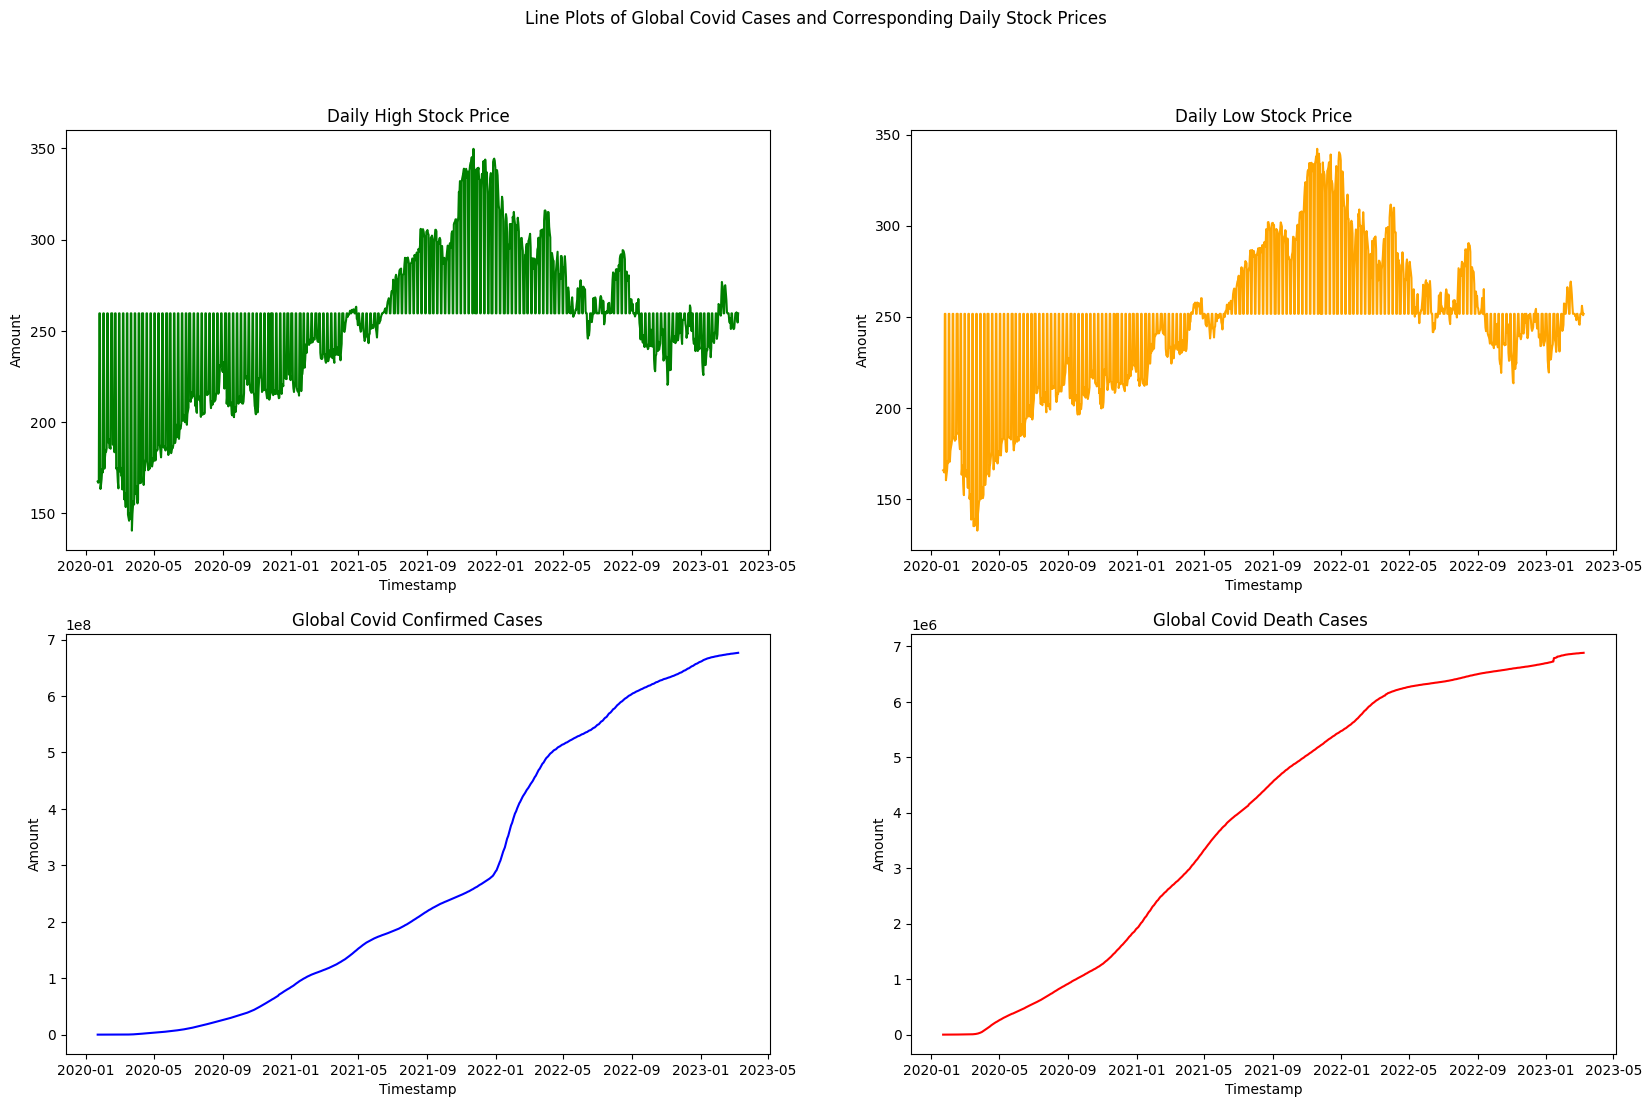

In [ ]:
import matplotlib.pyplot as plt


# convert the 'timestamp' column to datetime format
covid_stock['timestamp'] = pd.to_datetime(covid_stock['timestamp'])

# create a figure and four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# plot each value column in a separate subplot
axs[0, 0].plot(covid_stock['timestamp'], covid_stock['high'], color='green')
axs[0, 0].set_title('Daily High Stock Price')
axs[0, 1].plot(covid_stock['timestamp'], covid_stock['low'], color='orange')
axs[0, 1].set_title('Daily Low Stock Price')
axs[1, 0].plot(covid_stock['timestamp'], covid_stock['Confirmed_global'], color='blue')
axs[1, 0].set_title('Global Covid Confirmed Cases')
axs[1, 1].plot(covid_stock['timestamp'], covid_stock['Death_global'], color='red')
axs[1, 1].set_title('Global Covid Death Cases ')

# set x and y axis labels for each subplot
for ax in axs.flat:
    ax.set(xlabel='Timestamp', ylabel='Amount')

# add a title to the entire figure
fig.suptitle('Line Plots of Global Covid Cases and Corresponding Daily Stock Prices')

# display the plot
plt.show()